In [206]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [207]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [208]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [209]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [210]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables


In [211]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [212]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [213]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [214]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [215]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [216]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Find the most recent date in the data set. 
for row in session.query(measurement.date).order_by(measurement.date.desc()).first():
    print(row)
    recent_date = row

2017-08-23


In [14]:
from datetime import datetime

In [15]:
recent_date = datetime.fromisoformat(recent_date)

2016-08-23 00:00:00


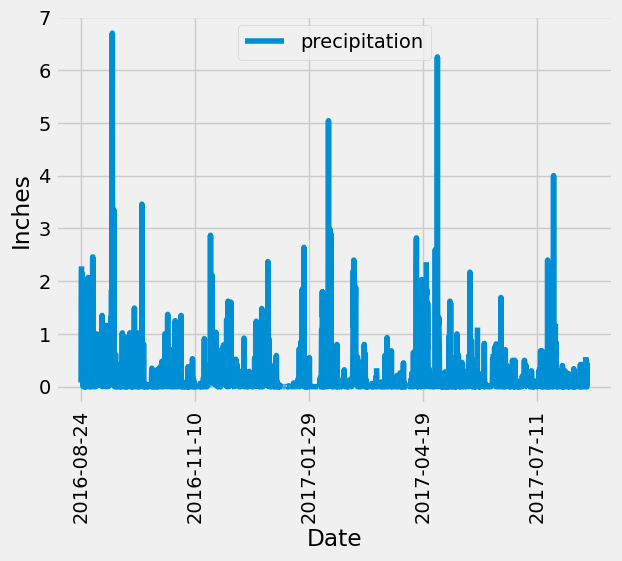

In [204]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

year_ago = recent_date - dt.timedelta(days=365)
print(year_ago)

# Perform a query to retrieve the data and precipitation scores
scores = session.query(measurement.date, measurement.prcp).filter(measurement.date > year_ago).order_by(measurement.date).all()



# Save the query results as a Pandas DataFrame. Explicitly set the column names
scores_pd = [{"Date":score[0],"precipitation":score[1]} for score in scores]

# Sort the dataframe by date
score_df = pd.DataFrame(scores_pd)

# Use Pandas Plotting with Matplotlib to plot the data
score_df.plot("Date","precipitation",rot=90)
plt.ylabel("Inches")
plt.show()

In [41]:
# Use Pandas to calculate the summary statistics for the precipitation data
score_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [51]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.station).distinct().count()

9

In [63]:
from sqlalchemy import desc

In [68]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
results = session.query(measurement.station, func.count(measurement.id).label("count")).group_by(measurement.station).order_by(desc("count"))

for result in results:
    print(result.station, result.count)


USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [79]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

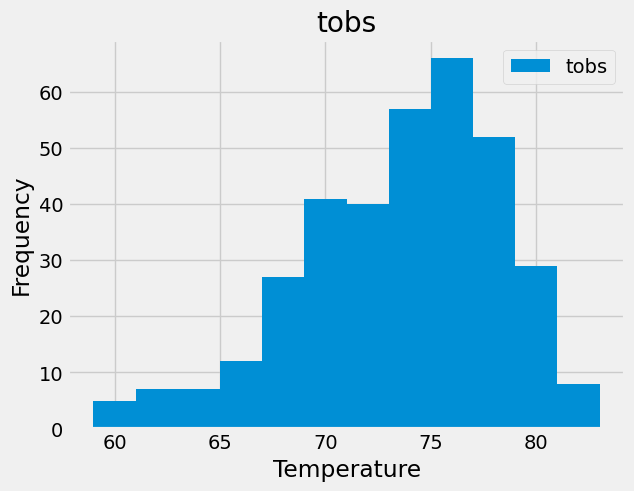

In [94]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs = session.query(measurement.tobs).filter(measurement.date > year_ago).filter(measurement.station == 'USC00519281').all()
tobs_pd = [{"tobs":tob[0]} for tob in tobs]
tobs_df = pd.DataFrame(tobs_pd)
tobs_df.hist(bins=12, label = 'tobs')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc='best')


# Close Session

In [205]:
# Close Session
session.close()